# 3 TESTING NOTEBOOK - TEST 2

In [1]:
# INSTALL SCIKERAS PACKAGES
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# IMPORT TENSORFLOW/KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

from keras.layers.core import Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# SCIKIT-LEARN/SCIKERAS
from sklearn import preprocessing
import sklearn.metrics as metrics
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report

# IMPORT OTHER MODULES
import os
import os.path
import sys
import glob
import datetime
from pathlib import Path

import fnmatch # to count number of image per folder easily
import random # to select random images from a folder
import numpy as np
import pandas as pd
from os import mkdir
import seaborn as sns
from pathlib import Path
from shutil import copyfile # to import "copyfile"
from numpy.random import seed
import matplotlib.image as img_mat
import plotly.figure_factory as ff # for printing the heatmap
from collections import defaultdict
from matplotlib import pyplot as plt
from IPython.display import Javascript

# CV2
import cv2
from google.colab.patches import cv2_imshow 

In [3]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# CONSTANT
SEED_VALUE = 42
num_classes = 9 # number of output classes
batch_size = 16
SIZE = 224  #Resize images --> https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network#:~:text=So%20the%20rule%20of%20thumb,for%20something%20smaller%20and%20easier.

# PATH TO THE DATA
ORIGINAL_DATA = "/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset"
base_path_test = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/'
DIR_TEST_DATA = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/*' # path contenente i sottoinsiemi di train, test

In [ ]:
# # # Capture training data and labels into respective lists
# # train_images = []
# # train_labels = [] 

# # # GET THE LABELS
# # for directory_path in glob.glob(DIR_TRAIN_DATA):
# #     tr_label = directory_path.split("/")[-1]
# #     print(tr_label)
# #     # GET THE IMAGES
# #     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
# #         # print(img_path)
# #         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
# #         img = cv2.resize(img, (SIZE, SIZE))
# #         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# #         train_images.append(img)
# #         train_labels.append(tr_label)

# # # CONVERT LISTS TO ARRAYS
# # train_images = np.array(train_images)
# # train_labels = np.array(train_labels)

# ################################################################
# # CAPTURE TEST/VALIDATION DATA AND LABELS INTO RESPECTIVE LISTS

# test_images = []
# test_labels = [] 
# for directory_path in glob.glob(DIR_TEST_DATA):
#     tt_label = directory_path.split("/")[-1]
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#         test_images.append(img)
#         test_labels.append(tt_label)

# #Convert lists to arrays                
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

In [ ]:
# def prep_fn(img):
#     img = img.astype(np.float32) / 255.0
#     img = (img - 0.5) * 2
#     return img

In [ ]:
preprocess_input_mobilenetV2 = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
base_path_train = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/train/'

# train_datagen_mnetv2 = ImageDataGenerator(preprocessing_function = preprocess_input_mobilenetV2)
train_datagen_mnetv2 = ImageDataGenerator()

train_generator_mnetv2 = train_datagen_mnetv2.flow_from_directory(
    base_path_train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    seed = SEED_VALUE)

Found 1803 images belonging to 9 classes.


In [ ]:
# test_datagen_mnetv2 = ImageDataGenerator() # rescale=1./255
# test_datagen_mnetv2 = ImageDataGenerator(preprocessing_function = preprocess_input_mobilenetV2) 
test_datagen_mnetv2 = ImageDataGenerator()

# TOGLIERE: USARE SOLO NEL NOTEBOOK DI TEST!
test_generator = test_datagen_mnetv2.flow_from_directory(
    base_path_test,
    target_size=(SIZE, SIZE), # target_size=(224,224),
    color_mode="rgb",
    batch_size=1,
    # batch_size=batch_size,
    shuffle=False,
    # class_mode="categorical",
    class_mode=None,
    seed = SEED_VALUE)

Found 155 images belonging to 9 classes.


In [ ]:
ground_truth_dict = test_generator.class_indices
ground_truth_dict

{'caesar_salad': 0,
 'caprese_salad': 1,
 'french_fries': 2,
 'greek_salad': 3,
 'hamburger': 4,
 'hot_dog': 5,
 'pizza': 6,
 'sashimi': 7,
 'sushi': 8}

In [13]:
# LOAD SAVED MODEL AND GET PATH FOR AN IMAGE
best_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2.h5") 

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

# test_generator.reset() # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

pred = best_model.predict(test_generator, 
                          steps=STEP_SIZE_TEST)

155/155 [==============================] - 23s 138ms/step


In [ ]:
len(pred)

155

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predicted_class_indices

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 4, 2, 2, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3,
       4])

In [ ]:
labels = (train_generator_mnetv2.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
test_generator.filenames

In [ ]:
filenames=test_generator.filenames
# filenames=train_generator_mnetv2.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

-------------------

In [4]:
# use Path object to grab all the images in a folder
caesar_salad_dir  = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/caesar_salad")
caprese_salad_dir = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/caprese_salad")
french_fries_dir  = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/french_fries")
greek_salad_dir   = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/greek_salad")
hamburger_dir     = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/hamburger")
hot_dog_dir       = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/hot_dog")
pizza_dir         = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/pizza")
sashimi_dir       = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/sashimi")
sushi_dir         = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset/sushi")

In [5]:
def generate_df(image_dir, label): 
  # get all the filepath. Convert to string for using flow_from_dataframe later
  filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name="Filepath").astype(str) # name: give the Series a name
  # labels
  labels = pd.Series(label, name="Label", index=filepaths.index)
  # concatenate two series as a dataframe
  df = pd.concat([filepaths, labels], axis=1)

  return df

In [6]:
caesar_salad_df  = generate_df(caesar_salad_dir,  label="CAESAR_SALAD")
caprese_salad_df = generate_df(caprese_salad_dir, label="CAPRESE_SALAD")
french_fries_df  = generate_df(french_fries_dir,  label="FRENCH_FRIES")
greek_salad_df   = generate_df(greek_salad_dir,   label="GREEK_SALAD")
hamburger_df     = generate_df(hamburger_dir,     label="HAMBURGER")
hot_dog_df       = generate_df(hot_dog_dir,       label="HOT_DOG")
pizza_df         = generate_df(pizza_dir,         label="PIZZA")
sashimi_df       = generate_df(sashimi_dir,       label="SASHIMI")
caesar_salad_df  = generate_df(caesar_salad_dir,  label="CAESAR_SALAD")
sushi_df         = generate_df(sushi_dir,         label="SUSHI")

In [7]:
all_df = pd.concat([caesar_salad_df,
                    caprese_salad_df,
                    french_fries_df,
                    greek_salad_df,
                    hamburger_df,
                    hot_dog_df,
                    pizza_df,
                    sashimi_df,
                    caesar_salad_df,
                    sushi_df], 
                   axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True) 
                   # sample and shuffle at the same time and reset index to have the correct values.
                   # drop the previous index so you do not have another column for that.

# problems:
#   - indeces are wrong
#   - the label are on top of each other and not shuffled
all_df

,Filepath,Label
0,/content/gdrive/MyDrive/Data_Science_2020-2022...,SUSHI
1,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
2,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
3,/content/gdrive/MyDrive/Data_Science_2020-2022...,HAMBURGER
4,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
...,...,...
999,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
1000,/content/gdrive/MyDrive/Data_Science_2020-2022...,FRENCH_FRIES
1001,/content/gdrive/MyDrive/Data_Science_2020-2022...,SUSHI
1002,/content/gdrive/MyDrive/Data_Science_2020-2022...,GREEK_SALAD


In [8]:
# this helps us to deal with memory issues to train a large dataset. Loading and training and recycling the memory at
# the same time. You can add a Data Augmentation process but it is not mandatory.
# But we can rescale the images so the pixel data are coming in as values between 0 and 1.
# The standard encoding for pixels values are in RGB scale between 0 and 255 (255 maximum color intensity for each of the three channels).
# By dividing by the maximum value (or mutiplying by 1/255) we are scaling all the pixels value into a range between 0 and 1.
# We also include a validation split: we can only split once for a given directory and we split the
# train set into train and validation and we use a separate generator for the test set. 
train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    # validation_split=0.4
)

test_gen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 # we do not include a validation split as mentioned before.
)

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    all_df,
    train_size=0.6,
    shuffle=True, # even though we have already shuffled
    random_state=1 # use it every time you shuffle
)

In [11]:
test_df

,Filepath,Label
954,/content/gdrive/MyDrive/Data_Science_2020-2022...,HAMBURGER
613,/content/gdrive/MyDrive/Data_Science_2020-2022...,FRENCH_FRIES
597,/content/gdrive/MyDrive/Data_Science_2020-2022...,SUSHI
372,/content/gdrive/MyDrive/Data_Science_2020-2022...,SASHIMI
754,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
...,...,...
88,/content/gdrive/MyDrive/Data_Science_2020-2022...,PIZZA
363,/content/gdrive/MyDrive/Data_Science_2020-2022...,SUSHI
273,/content/gdrive/MyDrive/Data_Science_2020-2022...,SASHIMI
172,/content/gdrive/MyDrive/Data_Science_2020-2022...,GREEK_SALAD


In [12]:
# now we flow from the dataframes
train_data = train_gen.flow_from_dataframe(
    train_df, # this is the dataframe were we are coming from
    x_col="Filepath",# which column used as a filepath and which column is used as a label
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb", # three color channels
    class_mode="categorical", # in the case of multi-label classification the class_mode should be categorical (which is the default value). "binary" in case we have "Positive", "Negative" class for example.
    batch_size=16, # standard
    shuffle=True,
    seed=42,
    # resize the images as you want. TO DO: NEED TO CHECK WHAT WAS THE ORIGINAL SIZES OF THE IMAGES!!!
    # CHIEDERE AL PROF UNA VOLTA RIASCOLTATE TUTTE LE LEZIONI COME PROCEDERE! LE IMMAGINI MI SEMBRAVA AVESSERO
    # DIFFERENTI SIZES. DEVI PRIMA ESPLORARE IL DATASET PER POTERLO CAPIRE VERAMENTE!
    # IMMAGINO DI DOVER USARE PRIMA OPENCV ALL'INIZIO PER DESCRIVERE IL DATASET CORRETTAMENTE.
    # PASSAGGIO FONDAMENTALE DA FARE E NON DIMENTICARE COME FATTO NELLA TESI!!!
    subset="training" # when we pull from the train_gen and we specify "training" we get 0.8 reserved for training and if we specify "validation" we get the 0.2 percent 
)

# valid_data = train_gen.flow_from_dataframe(
#     train_df, # this is the dataframe were we are coming from
#     x_col="Filepath",# which column used as a filepath and which column is used as a label
#     y_col="Label",
#     target_size=(224, 224),
#     color_mode="rgb", # three color channels
#     class_mode="categorical", # in the case of multi-label classification the class_mode should be categorical (which is the default value). "binary" in case we have "Positive", "Negative" class for example.
#     batch_size=32, # standard
#     shuffle=True,
#     seed=42,
#     # resize the images as you want. TO DO: NEED TO CHECK WHAT WAS THE ORIGINAL SIZES OF THE IMAGES!!!
#     # CHIEDERE AL PROF UNA VOLTA RIASCOLTATE TUTTE LE LEZIONI COME PROCEDERE! LE IMMAGINI MI SEMBRAVA AVESSERO
#     # DIFFERENTI SIZES. DEVI PRIMA ESPLORARE IL DATASET PER POTERLO CAPIRE VERAMENTE!
#     # IMMAGINO DI DOVER USARE PRIMA OPENCV ALL'INIZIO PER DESCRIVERE IL DATASET CORRETTAMENTE.
#     # PASSAGGIO FONDAMENTALE DA FARE E NON DIMENTICARE COME FATTO NELLA TESI!!!
#     subset="validation"
# )

# we do not have to specify a subset for the test data
test_data  = test_gen.flow_from_dataframe(
    test_df,
    x_col="Filepath",# which column used as a filepath and which column is used as a label
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb", # three color channels
    class_mode="categorical", # in the case of multi-label classification the class_mode should be categorical (which is the default value). "binary" in case we have "Positive", "Negative" class for example.
    batch_size=16, # standard
    shuffle=False, # we do not want to shuffle our test data, we encounter some problem otherwise evaluating the model. We want to mantain the model of the test sample because we want to compare them to the label in the end.
    seed=42,
    # subset="validation"
    # resize the images as you want. TO DO: NEED TO CHECK WHAT WAS THE ORIGINAL SIZES OF THE IMAGES!!!
    # CHIEDERE AL PROF UNA VOLTA RIASCOLTATE TUTTE LE LEZIONI COME PROCEDERE! LE IMMAGINI MI SEMBRAVA AVESSERO
    # DIFFERENTI SIZES. DEVI PRIMA ESPLORARE IL DATASET PER POTERLO CAPIRE VERAMENTE!
    # IMMAGINO DI DOVER USARE PRIMA OPENCV ALL'INIZIO PER DESCRIVERE IL DATASET CORRETTAMENTE.
    # PASSAGGIO FONDAMENTALE DA FARE E NON DIMENTICARE COME FATTO NELLA TESI!!!
)

# The function goes through all the images and will count them as well.
# First dataset:  train set
# Second dataset: validation set
# Third dataset:  test set

Found 602 validated image filenames belonging to 9 classes.
Found 402 validated image filenames belonging to 9 classes.


In [34]:
test_data.n

402

In [36]:
len(test_data.filenames)

402

In [37]:
test_data.reset()
pred=best_model.predict(test_data)

26/26 [==============================] - 17s 630ms/step


In [42]:
pred_bool = (pred >0.1)

In [44]:
predictions = pred_bool.astype(int)

columns=["caesar_salad", 
         "caprese_salad", 
         "french_fries", 
         "greek_salad", 
         "hamburger",
         "hot_dog",
         "pizza",
         "sashimi",
         "sushi"]

# columns should be the same order of y_col
results = pd.DataFrame(predictions, columns=columns)
results["Filenames"] = test_data.filenames
ordered_cols = ["Filenames"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("results.csv", index=False)



---



---





---



---



In [5]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

from keras.layers.core import Dense
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.pooling import GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# INSERISCI SITO E SPIEGAZIONE COME RIFERIMENTO: https://www.image-net.org/download.php

base_model_mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    # include_top means: do you want to keep the classification layer, the final classification that the original model was training on.
    # MobileNetV2 was originally trained on the ImageNet dataset. Because the final layer has 1000 classes, if we would keep it, we
    # would have 1000 classes at the end. We do not want that but, instead, we want our own classification layer at the end.
    include_top=False, 
    # We keep the same weights
    weights="imagenet",
    # # Average pooling at the end: it will ensure that the output of the pretrained model is one-dimensional (with n classes).
    # pooling="avg"
)
# With the following we ensure that we do not mess with the original
# imagenet weights
base_model_mobilenetv2.trainable = False


x = base_model_mobilenetv2.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
# We are using "softmax" since we want 9 probability values that all sum to 1 and the highest probability
# will be our classification result.
# For the regularizer: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-l1-l2-and-elastic-net-regularization-with-keras.md
preds = Dense(9, activation='softmax')(x) #final layer with softmax activation for N classes

model_mobilenetv2 = keras.Model(inputs = base_model_mobilenetv2.input, outputs = preds) #specify the inputs and outputs

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
# LOOK AT THE SUMMARY OF THE MODEL
print(model_mobilenetv2.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [7]:
# COMPILE THE MODEL
model_mobilenetv2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer= keras.optimizers.Adam(learning_rate=0.0001),
            metrics=['accuracy', tf.keras.metrics.Recall()])

In [8]:
# LOAD THE FOLDERS WHERE THE TRAINING/TESTING/VALIDATION DATA ARE STORED
base_path_train = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/train/'
base_path_test = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/'
base_path_val = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/'

In [9]:
# DATA AUGMENTATION ONLY ON THE TRAINING SET
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,
        rotation_range=45,
        fill_mode='nearest')  # randomly shift images vertically (fraction of total height))

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255) 

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    base_path_train,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    seed = 42)

test_generator = test_datagen.flow_from_directory(
    base_path_test,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False,
    class_mode="categorical",
    seed = 42)

val_generator = val_datagen.flow_from_directory(
    base_path_val,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False,
    class_mode="categorical",
    seed = 42)

Found 1803 images belonging to 9 classes.
Found 155 images belonging to 9 classes.
Found 192 images belonging to 9 classes.


In [10]:
# FIT THE MODEL
history_mobilenetV2 = model_mobilenetv2.fit(train_generator, 
                  validation_data = test_generator, 
                  steps_per_epoch = train_generator.n // train_generator.batch_size,
                  validation_steps = test_generator.n // test_generator.batch_size, 
                  epochs=30) #,
                  # callbacks = [callback]) --> ADD CALLBACK FUNCTION
                  
print("--- Training Completed ---")

Epoch 1/30
112/112 [==============================] - 398s 4s/step - loss: 0.9349 - accuracy: 0.7280 - recall: 0.4941 - val_loss: 0.5098 - val_accuracy: 0.8819 - val_recall: 0.7222
Epoch 2/30
112/112 [==============================] - 52s 466ms/step - loss: 0.2776 - accuracy: 0.9457 - recall: 0.8881 - val_loss: 0.3386 - val_accuracy: 0.8889 - val_recall: 0.8611
Epoch 3/30
112/112 [==============================] - 51s 458ms/step - loss: 0.1614 - accuracy: 0.9675 - recall: 0.9446 - val_loss: 0.2989 - val_accuracy: 0.8958 - val_recall: 0.8819
Epoch 4/30
112/112 [==============================] - 52s 461ms/step - loss: 0.1227 - accuracy: 0.9793 - recall: 0.9625 - val_loss: 0.2437 - val_accuracy: 0.9167 - val_recall: 0.8958
Epoch 5/30
112/112 [==============================] - 54s 477ms/step - loss: 0.0767 - accuracy: 0.9849 - recall: 0.9799 - val_loss: 0.2390 - val_accuracy: 0.9167 - val_recall: 0.9028
Epoch 6/30
112/112 [==============================] - 51s 457ms/step - loss: 0.0697 - a

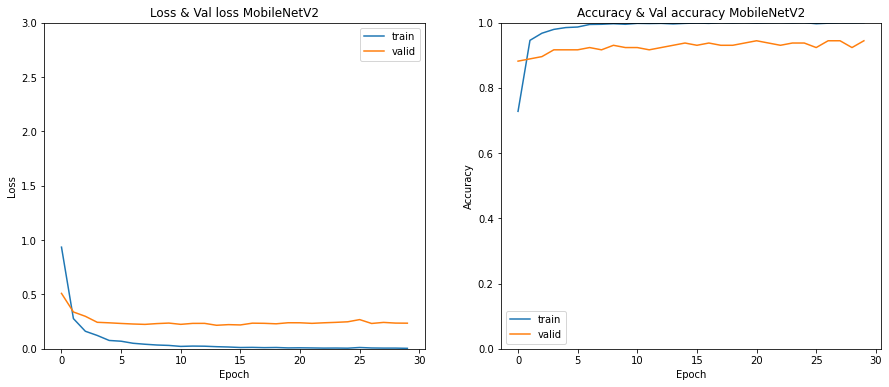

In [12]:
# PLOT THEM TOGETHER
# Visualization of the learning curves
plt.figure(figsize=(15,6))

# PER IL PLOT DOVRESTI USARE GLI ELEMENTI DERIVANTI DA history_grid_fit_mobilenetV2

plt.subplot(1, 2, 1)
plt.plot(history_mobilenetV2.history['loss'])
plt.plot(history_mobilenetV2.history['val_loss'])
plt.ylim([0.0, 3.0])
plt.title("Loss & Val loss MobileNetV2")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history_mobilenetV2.history['accuracy'])
plt.plot(history_mobilenetV2.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.title("Accuracy & Val accuracy MobileNetV2")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [11]:
# SAVE THE MODELV05
keras_model_mobilenetV2 = "/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2_SECONDA_PROVA.h5"
tf.keras.models.save_model(model_mobilenetv2, keras_model_mobilenetV2)

In [13]:
# LOAD SAVED MODEL AND GET PATH FOR AN IMAGE
best_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2_SECONDA_PROVA.h5") 

----------------------

In [ ]:
def prepare_image(file_check):
  img = image.load_img(file_check, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)

  # preprocess_input_mobilenetV2 = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
result = list()

imagepath1 = "/content/crop_caesar1.jpg_RESIZED.jpg"
imagepath2 = "/content/cropburger3.jpg_RESIZED.jpg"
imagepath3 = "/content/cropfries4.jpg_RESIZED.jpg"

preprocessed_image1 = prepare_image(imagepath1)
preprocessed_image2 = prepare_image(imagepath2)
preprocessed_image3 = prepare_image(imagepath3)

predictions1 = best_model.predict(preprocessed_image1)
print("pred1", predictions1[0])

predictions2 = best_model.predict(preprocessed_image2)
print("pred2", predictions2[0])

predictions3 = best_model.predict(preprocessed_image3)
print("pred3", predictions3[0])

result.append(np.argmax(predictions1))
result.append(np.argmax(predictions2))
result.append(np.argmax(predictions3))

FileNotFoundError: ignored

In [ ]:
result # french fries, sushi, sushi

In [ ]:
train_generator_mnetv2.class_indices

# Possible solutions

- https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

- https://github.com/keras-team/keras/issues/14303

In [ ]:
llllllllllllllllllllllllllllllll

In [14]:
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from keras.applications.mobilenet_v2 import preprocess_input
# from keras.applications.vgg16 import preprocess_input

def prepare_image(file_input, show=True):
    img = image.load_img(file_input, target_size=(SIZE, SIZE))
    img_array = image.img_to_array(img)
    # img_array_expanded_dims = preprocess_input(img_array)
    img_array= (img_array/255.0)
    # img_array = img_array.astype(np.float32) / 255.0
    # img_array = (img_array - 0.5) * 2
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    # img_array_expanded_dims = preprocess_input(img_array_expanded_dims)

    if show:
      plt.imshow(img_array_expanded_dims[0])                           
      plt.axis('off')
      plt.show()

    return img_array_expanded_dims

    # return img_array_expanded_dims

In [ ]:
# CREATE A LIST TO STORE THE PATH OF EACH RANDOM IMAGE
inference_data = list()

# current_directory = Path("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset")
# current_directory = Path('/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/')
current_directory = Path(base_path_val)
# current_directory = Path('/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDatasetPreprocessed')

for folder in current_directory.iterdir():
  split_str = str(folder).split("/")[-1] # get the folder name
  print(split_str)
  file_path_type = [f"{current_directory}/{split_str}/*.jpg"]  
  # print(file_path_type)
  images = glob.glob(random.choice(file_path_type))
  # print(images)

  for i in range(1):
    # if len(inference_data) > 1:
    #   break
    random_image = random.choice(images)
    # print(random_image)
    inference_data.append(random_image)
    # img_raw = cv2.imread(random_image)
    print(inference_data)
    print("------------")

In [ ]:
# LOAD SAVED MODEL AND GET PATH FOR AN IMAGE
# best_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2.h5") 

In [ ]:
# im_test = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/hot_dog/20160711_1214411.jpg_RESIZED.jpg'

In [ ]:
# img = image.load_img(im_test, target_size=(224,224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# print(full_model.predict(x))
# plt.imshow(img)

french_fries


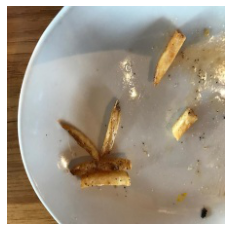

1/1 [==============================] - 1s 747ms/step
Output index is: [2]

The food predicted is: french_fries.
------------------------ NEXT IMAGE ----------------------------

caprese_salad


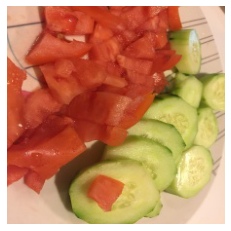

1/1 [==============================] - 0s 47ms/step
Output index is: [1]

The food predicted is: caprese_salad.
------------------------ NEXT IMAGE ----------------------------

pizza


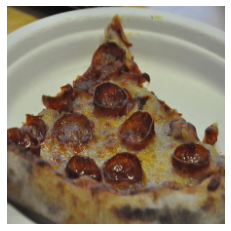

1/1 [==============================] - 0s 39ms/step
Output index is: [6]

The food predicted is: pizza.
------------------------ NEXT IMAGE ----------------------------

greek_salad


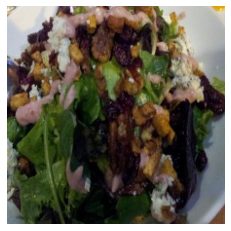

1/1 [==============================] - 0s 52ms/step
Output index is: [8]

The food predicted is: sushi.
------------------------ NEXT IMAGE ----------------------------

sashimi


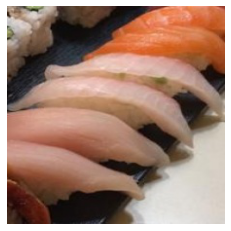

1/1 [==============================] - 0s 41ms/step
Output index is: [7]

The food predicted is: sashimi.
------------------------ NEXT IMAGE ----------------------------

hot_dog


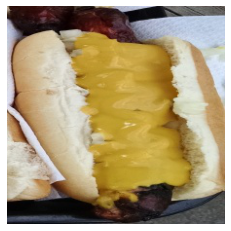

1/1 [==============================] - 0s 40ms/step
Output index is: [5]

The food predicted is: hot_dog.
------------------------ NEXT IMAGE ----------------------------

caesar_salad


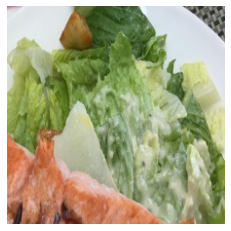

1/1 [==============================] - 0s 43ms/step
Output index is: [0]

The food predicted is: caesar_salad.
------------------------ NEXT IMAGE ----------------------------

hamburger


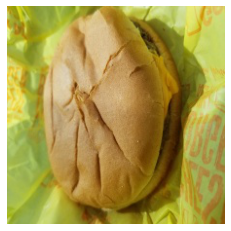

1/1 [==============================] - 0s 47ms/step
Output index is: [4]

The food predicted is: hamburger.
------------------------ NEXT IMAGE ----------------------------

sushi


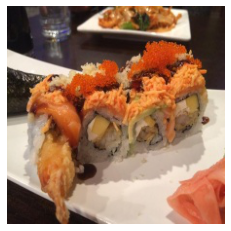

1/1 [==============================] - 0s 44ms/step
Output index is: [8]

The food predicted is: sushi.
------------------------ NEXT IMAGE ----------------------------

Predicted: [2, 1, 6, 8, 7, 5, 0, 4, 8]
Ground Truth [2, 1, 6, 3, 7, 5, 0, 4, 8]


In [16]:
pred_output_list = list()
ground_truth_list = list()
ground_truth_dict = test_generator.class_indices

for image_path in inference_data:
  split_str = str(image_path).split("/")[-2] # get the folder name
  print(split_str)
  new_image = prepare_image(image_path)
  # print(new_image.shape)
  pred = best_model.predict(new_image)

  # Generate arg maxes for predictions
  output_index = np.argmax(pred[[0]], axis = 1)
  # output_index = np.argmax(pred, axis = 1)
  print("Output index is:", output_index)

  pred_output_list.append(output_index[0])
  ground_truth_list.append(ground_truth_dict[f'{split_str}'])

  # if max(pred[0]) < 0.50:
  #   print("I'm sorry, I cannot recognise any type of food here! Try again!")
  #   print("The groud truth is", split_str)
  # else:
  #   value = [i for i in test_generator.class_indices if test_generator.class_indices[i]==np.argmax(pred, axis = 1)]
  #   print(f"The food in this image should be: {value[0]}.")
  #   print("The groud truth is", split_str, ".")
  
  print("")
  value = [i for i in test_generator.class_indices if test_generator.class_indices[i] == output_index]
  print(f"The food predicted is: {value[0]}.")
  print("------------------------ NEXT IMAGE ----------------------------")
  print("")

print("Predicted:", pred_output_list)
print("Ground Truth", ground_truth_list)

In [17]:
# CREATE A DATAFRAME TO COMPARE THE RESULTS
df_comparison = pd.DataFrame({"predicted": pred_output_list, "ground truth": ground_truth_list})

df_comparison['comparison'] = np.where(df_comparison['predicted'] == df_comparison['ground truth'], 1, 
                                      np.where(df_comparison['predicted'] !=  df_comparison['ground truth'], 0, -1))

df_comparison

,predicted,ground truth,comparison
0,2,2,1
1,1,1,1
2,6,6,1
3,8,3,0
4,7,7,1
5,5,5,1
6,0,0,1
7,4,4,1
8,8,8,1


**MIGLIOR RISULTATO FINORA. POTREBBE ESSERE UN PROBLEMA DI INDICI???**

In [18]:
# COMPUTE ACCURACY OVER THE TEN ELEMENTS
accuracy_over_test = (np.sum(df_comparison['comparison'])/len(df_comparison))*100
print(f"Accuracy over {len(df_comparison)} images is:", accuracy_over_test, "%")

Accuracy over 9 images is: 88.88888888888889 %


**SPECIFICARE CHE I BAD RESULTS SONO DATI DA SUSHI E SASHIMI**

QUELLO CHE POTRESTI FARE E' PROVARE CON UN ALTRO DATASET FOOD E RIFARE LA STESSA COSA CON UN DATASET DIVERSO E MAGARE USARNE UN ALTRO ANCHE!